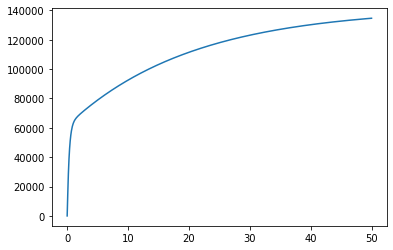

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas as pd
import lmfit as lm
plt.ion()
#single promoter leakage/basal expression
lr = 2;        #mRNA leakage term ogv =2
mr = 200;       #Max mRNA production rate ogv=200
tr = 37.5;      #Translation rate
g1 = 3.5;       #mRNA degradation/dilution rate
g2 = 0.06;    #Protein degradation/dilution rate
b = 0.2;        #TetR binding to TetR promoter
u = 20.8;       #TetR unbinding to TetR promoter
#ODE's
#dP0 = -b*P0i*Ri + u*P1i
#dP1 = b*P0i*Ri - u*P1i - b*P1i*Ri + u*P2i
#dP2 = b*P1i*Ri - u*P2i
#dmRNA = mr*P0i + lr - mRNAi*g1
#dR = mRNAi*tr - Ri*g2 -b*P0i*Ri -b*P1i*Ri +u*P1i +u*P2i
#dG = mRNAi*tr - Gi*g2
# Species
def f(vec, t, lr, mr,tr,g1,g2,b,u):
    P0i=vec[0]      #Free GFP & TetR promoter
    P1i=vec[1]    #1 bound GFP & TetR promoter
    P2i=vec[2]     #2 bound GFP & TetR promoter
    mRNAi=vec[3]   #mRNA levels
    Ri=vec[4]     #TetR Protein levels
    Gi=vec[5]    #GFP protein levels
    vec = [P0i,P1i,P2i,mRNAi,Ri,Gi]
  
    # Parameters
    lr = 605;        #mRNA leakage term ogv =2
    mr = 625;       #Max mRNA production rate ogv=200
    tr = 38;      #Translation rate ogv = 37.5
    g1 = 3.35;       #mRNA degradation/dilution rate ogv = 3.5
    g2 = 0.0485;    #Protein degradation/dilution rate ogv = 0.046
    b = 0.2;        #TetR binding to TetR promoter ogv = 0.2
    u = 20.8;       #TetR unbinding to TetR promoter ogv = 20.8
    return np.array([-b*P0i*Ri + u*P1i,
                    b*P0i*Ri - u*P1i - b*P1i*Ri + u*P2i,
                    b*P1i*Ri - u*P2i,
                    mr*P0i + lr - mRNAi*g1,
                    mRNAi*tr - Ri*g2 -b*P0i*Ri -b*P1i*Ri +u*P1i +u*P2i,
                    mRNAi*tr - Gi*g2])
    #return [dP0, dP1, dP2, dmRNA, dR, dG]
#initial conditions
mRNA0=0              #TetR mrna  
GFP10= 2200                    #GFP
TetR0= 0                    #unbound/active TetR protein ogv=0
P00= 0                    #0 TetR bound to TetR promoter
P10= 0                     #1 TetR bound to TetR promoter
P20= 1                     #2 TetR bound to TetR promoter
vec0 = [mRNA0, GFP10, TetR0, P00, P10, P20]
t = np.linspace(0,50,1000)
soln = odeint(f, vec0, t, args=(lr, mr, tr, g1, g2, b, u))
gfp = soln.T[5]
#P0 = soln[:,0]
#P1 = soln[:,1]
#P2 = soln[:,2]
#mRNA = soln[:,3]
#R = soln[:,4]
#G = soln[:,5]
plt.figure()
plt.plot(t,gfp)
#plt.plot(t, mRNA)

In [104]:
#import Dataset remove measurements after 50 hrs
gfpi =pd.read_excel("12_8_20_comp_gfp_intensity.xlsx")
gfpi_data_cut = gfpi[0:150]
gfpi_data_cut = gfpi_data_cut.values.T

In [105]:
#gfpi_data.shape
gfpi_data_cut.shape

(161, 150)

In [106]:
time = gfpi_data_cut[0].astype(np.double)
gfp_data = gfpi_data_cut[1:].astype(np.double)

Text(0, 0.5, 'integrated intensity')

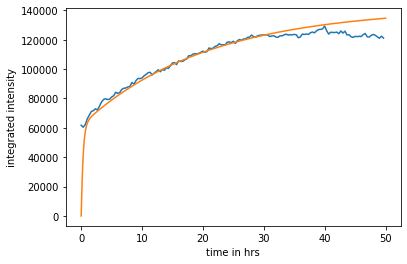

In [107]:
for data in gfp_data[:1]:
    plt.plot(time, data)
    plt.plot(t, gfp)
plt.xlabel("time in hrs")
plt.ylabel("integrated intensity")

In [96]:
#least squares fitting of ODE
gfp_mod = lm.Model(f)
data = gfp_data[1]
pars = gfp_mod.make_params()
pars['lr'].set(value = 2, vary = True, min=0, max =200)
pars['mr'].set(value = 200, vary = False)
pars['tr'].set(value = 37.5, vary = False)
pars['g1'].set(value = 3.5, vary =False)
pars['g2'].set(value = 0.046, vary = False)
pars['b'].set(value = 0.2, vary = False)
pars['u'].set(value =20.8, vary = False)


In [102]:
#results = gfp_mod.fit(data, pars, time, method='leastsq')